[View in Colaboratory](https://colab.research.google.com/github/xmpuspus/Lectures/blob/master/red_green_displacement_EDA.ipynb)

# Green-Red Displacement : Linear Regression  
Linear regression is the simplest method of predicting continuous variables. Its all about establishing a relationship between dependent variable (*Y*) and one or more independent variables (*X*) using a best fit straight line (also known as regression line).

Mathematically,

$\begin {equation}
h(x_i) = y = m_i x_i + b
\end {equation}$

where $m_i$ is the linear coefficient (slope) and $b$ is the intercept.

### Why learn linear regression?

- Easy to use,
- Used everywhere,
- Runs quickly,
- interpretable,
- most basic form of machine learning.  




In [0]:
# IMPORT GENERIC PACKAGES
import numpy as np # numerical calc package
import pandas as pd # holds data
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # pretty plotting
# sns.set() # set pretty plot formatting
sns.set(rc={'figure.figsize':(20,10)})

# IMPORT MACHINE LEARNING PACKAGES
from sklearn.model_selection import train_test_split # used to split dataset
from sklearn.linear_model import LinearRegression # linear regression package

# IMPORT MACHINE LEARNING PACKAGES
from sklearn.model_selection import train_test_split # used to split dataset
from sklearn.metrics import confusion_matrix as cf # used to print out confusion matrix

# Background  
The experiment tests differences in color perception. We explore the task of finding a relation between the distance variations with relation to successes in identifying closeness from a point of reference. The objective is to use linear regression to find mathematical relations between the probability of telling if a green bolt or a red bolt is closer to a reference which in this case is a white bolt.

# Exploratory Data Analysis


In [0]:
# read data
data = pd.read_csv('red_green_displacement.csv').set_index('image_ID')

In [5]:
data.head()

,red_X,red_Y,green_X,green_Y,result,distance_red_to_source_d1,distance_green_to_source_d2,delta_d,proba_with_validation,proba_without_validation
image_ID,,,,,,,,,,
1,7,0,-2,0,green,7.0,2.0,5.0,1.0,1.000000
2,6,0,-2,0,green,6.0,2.0,4.0,1.0,1.000000
3,5,0,-2,0,green,5.0,2.0,3.0,0.8,0.800000
4,4,0,-2,0,green,4.0,2.0,2.0,0.8,0.777778
5,3,0,-2,0,green,3.0,2.0,1.0,0.9,0.888889


In [7]:
green_red_bool = pd.get_dummies(data['result'])
green_red_bool.head()

,green,red
image_ID,,
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0


In [11]:
data.dtypes != 'object']

red_X                           True
red_Y                           True
green_X                         True
green_Y                         True
result                         False
distance_red_to_source_d1       True
distance_green_to_source_d2     True
delta_d                         True
proba_with_validation           True
proba_without_validation        True
dtype: bool

In [16]:
# merge back to full dataframe of numeric values
full_features = pd.concat([data[data.columns[data.dtypes != 'object']], green_red_bool], axis = 1)
full_features.head()

,red_X,red_Y,green_X,green_Y,distance_red_to_source_d1,distance_green_to_source_d2,delta_d,proba_with_validation,proba_without_validation,green,red
image_ID,,,,,,,,,,,
1,7,0,-2,0,7.0,2.0,5.0,1.0,1.000000,1,0
2,6,0,-2,0,6.0,2.0,4.0,1.0,1.000000,1,0
3,5,0,-2,0,5.0,2.0,3.0,0.8,0.800000,1,0
4,4,0,-2,0,4.0,2.0,2.0,0.8,0.777778,1,0
5,3,0,-2,0,3.0,2.0,1.0,0.9,0.888889,1,0


We take a look at the correlation map of each of these variables. We suspect high, if not perfect, correlations between coordinates and distances.

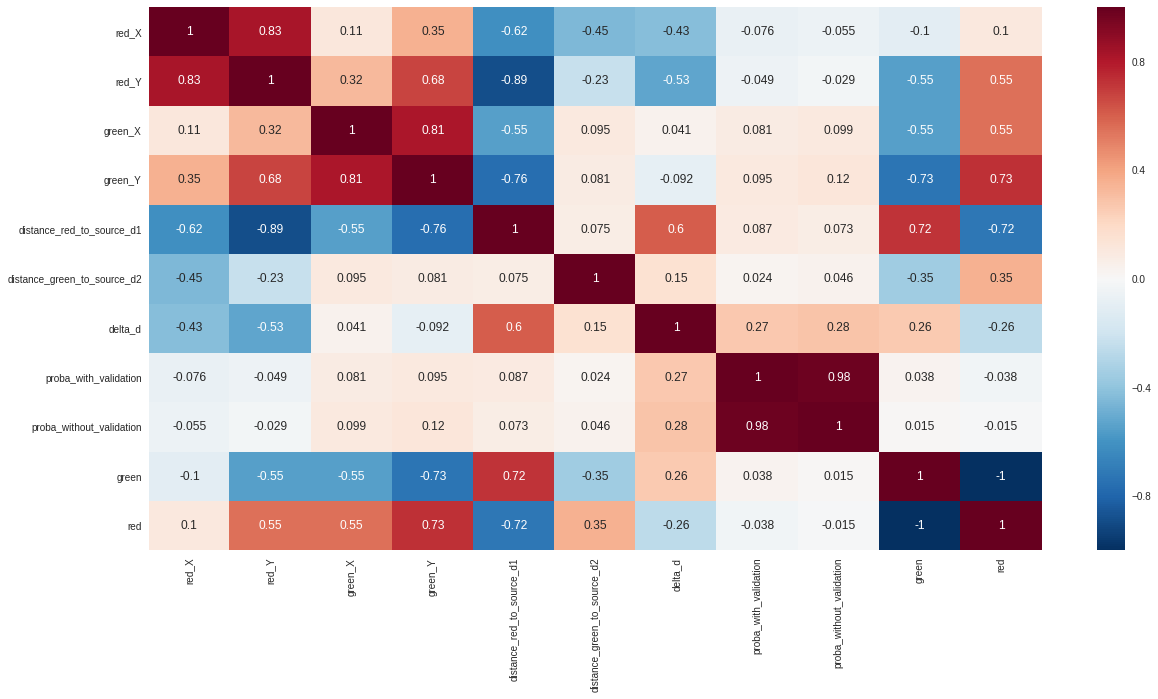

In [17]:
sns.heatmap(full_features.corr(), annot = True)

As expected, distance and coordinates are highly correlated with each other. We also see how the distances of the red ang green bolts aren't correlated enough with the probability of figuring out distance perception from color variances. From this we expect to only use distances from origin as regression features and probabilities as targets. 

# Data Distribution

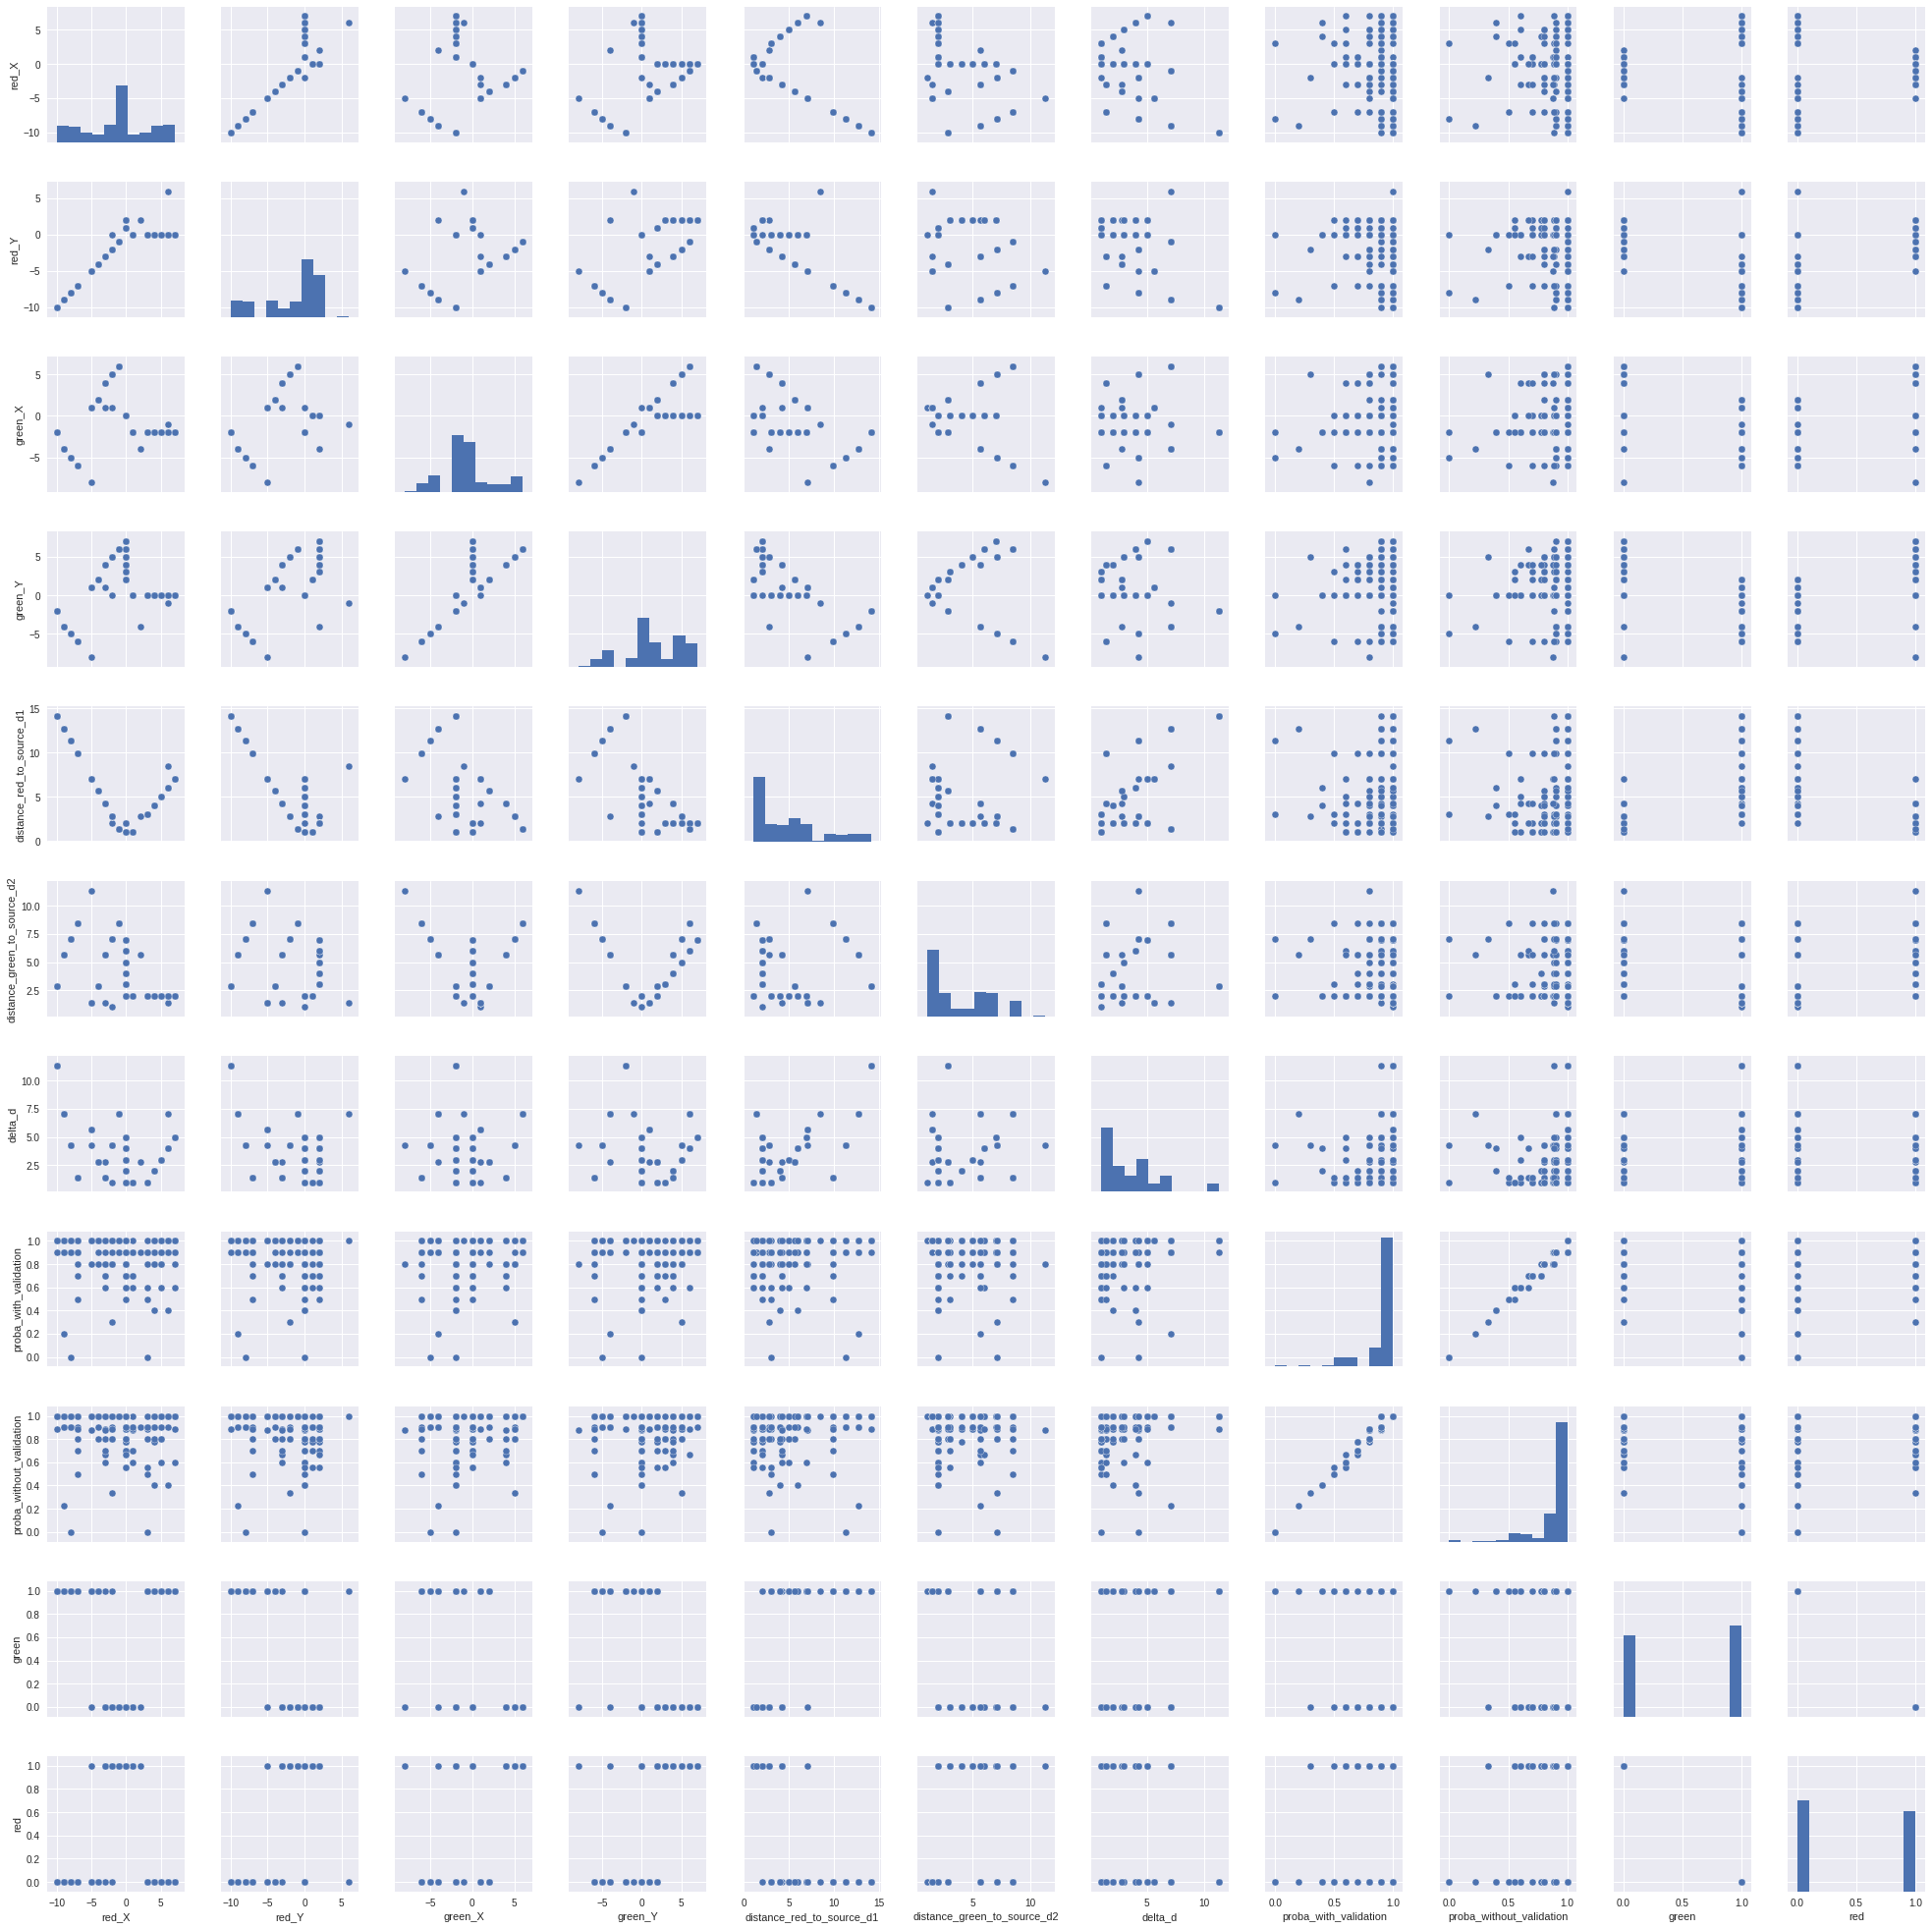

In [52]:
# Create scatter plots and distribution plots
sns.pairplot(full_features)

### Without-Validation Setup  
We prepare the feature-target for without-validation part.

In [0]:
features_wo = full_features.drop(['proba_without_validation', 'proba_with_validation'], axis = 1)
target_wo = full_features['proba_without_validation']

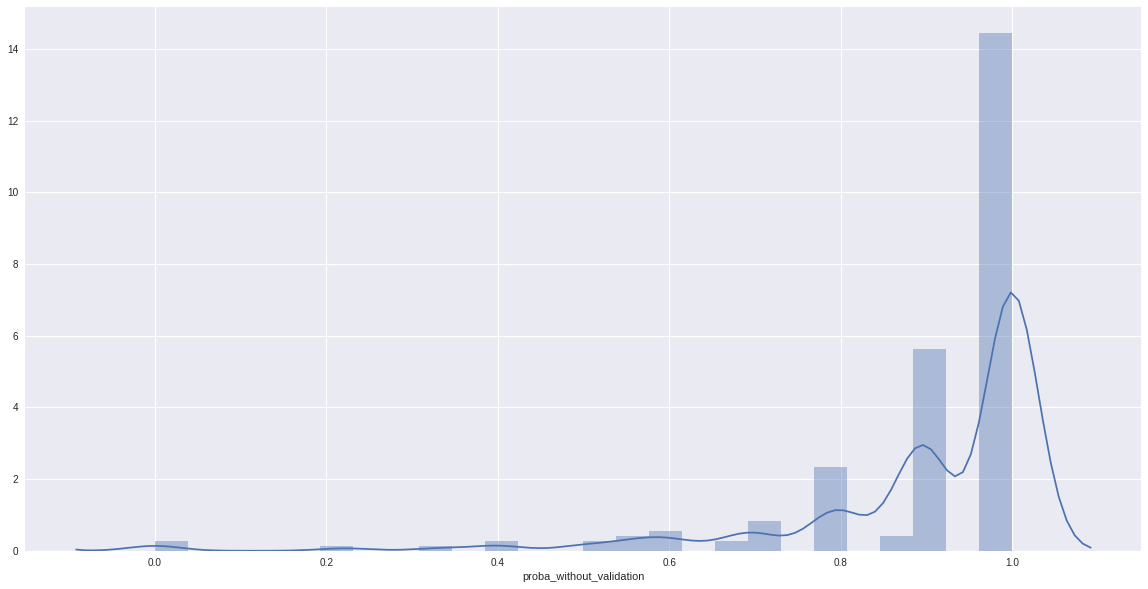

In [40]:
sns.distplot(target_wo)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


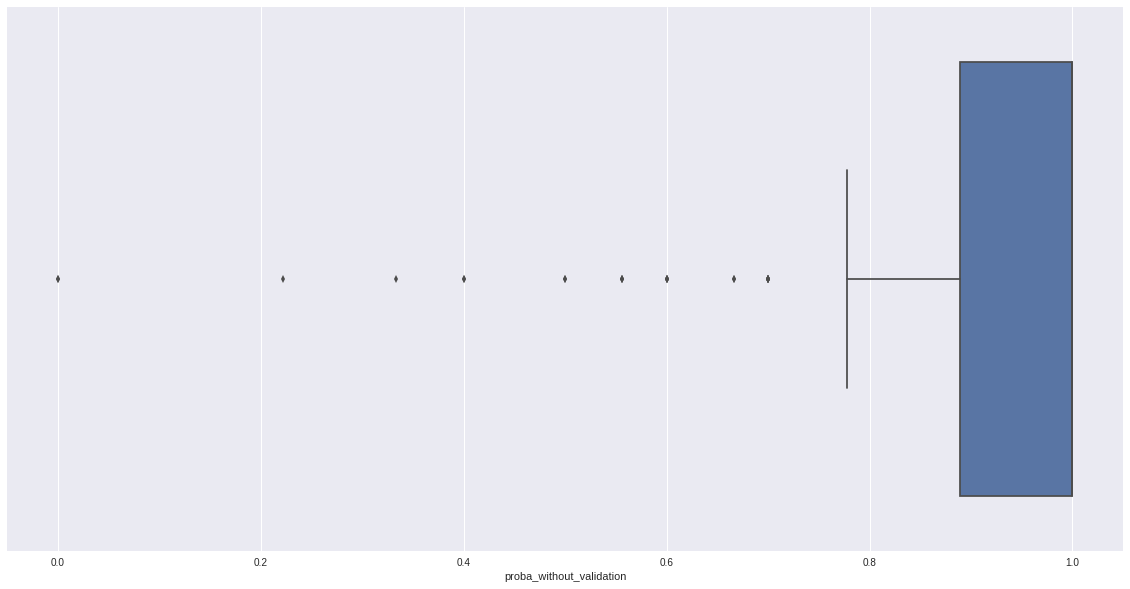

In [41]:
sns.boxplot(target_wo)

The data is extremely right-skewed. This means most of the people tend to get location difference correct regardless of switches and small variations.

# Linear Regression : Without Validation

In [48]:
X_wo = features_wo
y_wo = target_wo

# The usual sklearn pattern: import, instantiate, fit
lm = LinearRegression() # initialize model
lm.fit(X_wo, y_wo) # fit data to model

# print intercept and coefficients
print ('Intercept' , lm.intercept_)

# pair the feature names with the coefficients
pd.DataFrame((list(zip(X_wo.columns, lm.coef_))),
             columns = ['Features', 'Coefficients']).sort_values('Coefficients', ascending = False)

Intercept 0.8047690490252772


,Features,Coefficients
7,green,0.039356
6,delta_d,0.020982
1,red_Y,0.019132
3,green_Y,0.007164
5,distance_green_to_source_d2,0.003586
4,distance_red_to_source_d1,0.002878
2,green_X,0.000608
0,red_X,-0.008846
8,red,-0.039356


In [49]:
# calculate the R-squared
lm.score(X_wo, y_wo)

0.1192551361408608

### Interpreting the Coefficients
- This means that distance of the red and green from the source is trivially less important than their distance from each other. However, its interesting to note how we can see from the data that when green is much closer to the source, people have a higher probability of getting it right. Although given such a low $R^2$ value of only 0.12, this means none of these variables are strongly related to the probability of people getting it right.



# Linear Regression : WIth Validation  
We do the same for *with-validation* setup.

In [53]:
X_w = features_wo
y_w = full_features['proba_with_validation']

# The usual sklearn pattern: import, instantiate, fit
lm2 = LinearRegression() # initialize model
lm2.fit(X_w, y_w) # fit data to model

# print intercept and coefficients
print ('Intercept' , lm2.intercept_)

# pair the feature names with the coefficients
pd.DataFrame((list(zip(X_w.columns, lm2.coef_))),
             columns = ['Features', 'Coefficients']).sort_values('Coefficients', ascending = False)

Intercept 0.8153566220159101


,Features,Coefficients
7,green,0.045781
1,red_Y,0.019778
6,delta_d,0.019252
3,green_Y,0.007118
4,distance_red_to_source_d1,0.001579
5,distance_green_to_source_d2,0.001356
2,green_X,0.000344
0,red_X,-0.011463
8,red,-0.045781


In [55]:
# calculate the R-squared
lm2.score(X_w, y_w)

0.10594488282342585

We see the same results for with validation. Green being closer to the source seems to be a strong predictor for people determining which bolt is further or closer. But since the regression score is low, I suggest having more features and more data points in order to get better results.